<center><h1>Nigeria Presidential Candidates (2023) Tweets</h1></center>

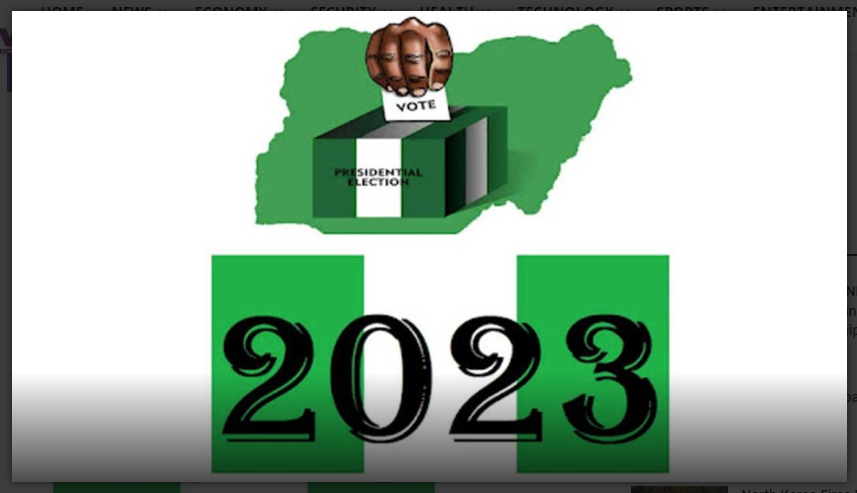



<br>

# <a id='0'>Content</a>

- <a href='#1'>Introduction</a>  
- <a href='#2'>Data Preparation</a>  
    - Load packages
    - Load data
- <a href='#3'>Data exploration</a>   
    - <a href='#31'>Glimpse the data</a> 
        - Missing data
        - Unique values
        - Most frequent values
    - <a href='#32'>Visualize the data distribution</a>  
        - User name
        - User description 
        - Tweet source
        - User location
        - Hashtags 
        - Text worldclouds
           - User location
           - User description
           - Hashtags
    - <a href='#33'>Time variation</a> 
        - Extract time features
        - Time variable features
        - Last tweets texts, including time            
        - Prevalent words grouped by user description
        - Tweets per day of week, hour, minute
    - <a href='#34'>Sentiment analysis</a> 
    - <a href='#34'>Topic modeling

<h1>Nigeria Presidential Candidates (2023) Tweets</h1>

# Introduction


The dataset we are using here was collected using the Twitter API, Tweepy, and the Python package. It represents tweets by Nigerian presidential candidates and tweets about them from Nigerian citizens.

In February 2023, Nigeria held its presidential elections, and there are several candidates competing for the position. The tweets we collected use several trending hashtags related to the Nigerian election, Nigerian presidential candidates, and tweets by citizens with top electoral preferences.

These tweets explore the use of sentiment analysis in analyzing the sentiment towards Nigerian presidential candidates and the importance of sentiment analysis in political campaigns, such as people's opinions, emotions, and attitudes expressed in text data. This provides valuable insights into the public perception of Nigerian presidential candidates and their campaigns.

# Data preparation

## Load packages

In [1]:
#import all necessary packages
import numpy as np 
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from wordcloud import WordCloud, STOPWORDS
from sklearn.decomposition import LatentDirichletAllocation
from collections import Counter
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob

from sklearn.feature_extraction.text import CountVectorizer
import scipy.stats as stats

from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE
import warnings
warnings.simplefilter("ignore")

## Load data

In [2]:
## Reading the Data
# saving it as a dataframe with the name tweets_df
tweets_df = pd.read_csv("/kaggle/input/nigerian-presidential-election-2023-tweets/nigerian_presidential_election_2023_tweets.csv")

# Data exploration


## Glimpse the data

In [3]:
#checking for the shape of the data
print(f"data shape: {tweets_df.shape}")

data shape: (85662, 16)


In [4]:
## displaying some information about dataframe
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85662 entries, 0 to 85661
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                85661 non-null  object 
 1   user_name         85657 non-null  object 
 2   user_location     64280 non-null  object 
 3   user_description  78176 non-null  object 
 4   user_created      85651 non-null  object 
 5   user_followers    85651 non-null  object 
 6   user_friends      85651 non-null  object 
 7   user_favourites   85651 non-null  object 
 8   user_verified     85649 non-null  object 
 9   date              85650 non-null  object 
 10  text              85651 non-null  object 
 11  hashtags          45586 non-null  object 
 12  source            85651 non-null  object 
 13  retweets          85646 non-null  object 
 14  favorites         85645 non-null  float64
 15  is_retweet        85645 non-null  object 
dtypes: float64(1), object(15)
memory usage: 

In [5]:
# displaying some descriptive statistic abput the data
tweets_df.describe()

,favorites
count,85645.000000
mean,140.611057
std,2451.308377
min,0.000000
25%,0.000000
50%,0.000000
75%,2.000000
max,188308.000000


In [6]:
# displaying few top rows from the tweets_df dataframe
tweets_df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1617619263392743424,Fabulous Faga,"Abakaliki, Nigeria",🌹A Social media influencer\n💃A scientist by pr...,2020-10-19 08:02:47+00:00,244,999,686,False,2023-01-23 20:24:20+00:00,#OBI and #wife storm kastina state today.\n\nS...,"['OBI', 'wife']",Twitter for Android,0.0,5.0,False
1,1617648566977302534,Patriotic Nigerian,"Lagos, Nigeria",inspiring and amazingly created. Marketing/ Br...,2021-03-30 22:04:11+00:00,688,2827,3488,False,2023-01-23 22:20:47+00:00,"If they can’t point to you one project , inves...","['peterobi', 'Atiku']",Twitter for iPhone,11.0,15.0,False
2,1617657018873171969,Promise,NaN,Health and Fitness enthusiast,2022-05-06 23:03:08+00:00,2,22,40,False,2023-01-23 22:54:22+00:00,@atiku God with his infinite mercy will never ...,NaN,Twitter for iPhone,0.0,0.0,False
3,1617584206317752321,KemKem,"Lagos, Nigeria",My Tweets & Views are Personal & do not\nrefle...,2015-01-01 07:40:09+00:00,24474,1931,129947,False,2023-01-23 18:05:02+00:00,Governor @RotimiAkeredolu takes Asiwaju Bola A...,NaN,Twitter for Android,14.0,40.0,False
4,1617619489184690178,Mo'6icky,NaN,"By nature, an optimist_📌",2019-05-09 16:31:33+00:00,22,198,540,False,2023-01-23 20:25:14+00:00,@atiku Salutation is not Love. #Obi is coming,['Obi'],Twitter for Android,0.0,4.0,False


### Missing data

In [7]:
#Calculating the percentage of missing data and 
#Checking for the total amount of missing data

def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

In [8]:
missing_data(tweets_df)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
Total,1,5,21382,7486,11,11,11,11,13,12,11,40076,11,16,17,17
Percent,0.001167,0.005837,24.960893,8.738997,0.012841,0.012841,0.012841,0.012841,0.015176,0.014009,0.012841,46.783871,0.012841,0.018678,0.019845,0.019845
Types,object,object,object,object,object,object,object,object,object,object,object,object,object,object,float64,object


### Unique values

In [9]:
#Checking for the total amount of unique values in the data
def unique_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    uniques = []
    for col in data.columns:
        unique = data[col].nunique()
        uniques.append(unique)
    tt['Uniques'] = uniques
    return(np.transpose(tt))

In [10]:
unique_values(tweets_df)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
Total,85661,85657,64280,78176,85651,85651,85651,85651,85649,85650,85651,45586,85651,85646,85645,85645
Uniques,83544,32350,7031,30252,32710,12119,6008,19206,6,79382,82524,15126,192,1308,1439,1


### Most frequent values

In [11]:
#Checking for the total amount of frequent values in the data
def most_frequent_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    items = []
    vals = []
    for col in data.columns:
        try:
            itm = data[col].value_counts().index[0]
            val = data[col].value_counts().values[0]
            items.append(itm)
            vals.append(val)
        except Exception as ex:
            print(ex)
            items.append(0)
            vals.append(0)
            continue
    tt['Most frequent item'] = items
    tt['Frequence'] = vals
    tt['Percent from total'] = np.round(vals / total * 100, 3)
    return(np.transpose(tt))

In [12]:
most_frequent_values(tweets_df)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
Total,85661,85657,64280,78176,85651,85651,85651,85651,85649,85650,85651,45586,85651,85646,85645,85645
Most frequent item,1637160612638629888.0,234𝐑𝐚𝐝𝐢𝐨 🌍,Nigeria,Africa’s premium internet radio. \nYour one-st...,2013-07-17 16:30:59+00:00,3,1155,8,False,2023-03-18 15:00:03+00:00,"Good evening, remember to vote Labour Party at...",['NigeriaDecides2023'],Twitter for Android,0.0,0.0,False
Frequence,2,3588,9652,3588,3588,680,1020,2238,80637,11,17,11574,43580,45281,43126,85645
Percent from total,0.002,4.189,15.016,4.59,4.189,0.794,1.191,2.613,94.148,0.013,0.02,25.389,50.881,52.87,50.354,100.0


## Visualize the data distribution

In [13]:
#writing a function to visualize all the univariate features
def plot_count(feature, title, df, size=1, ordered=True):
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    total = float(len(df))
    if ordered:
        g = sns.countplot(df[feature], order = df[feature].value_counts().index[:10], palette='Blues_r')
    else:
        g = sns.countplot(df[feature], palette='Set3')
    g.set_title("Number and percentage of {}".format(title))
    if(size > 2):
        plt.xticks(rotation=90, size=15)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 
    plt.show()    

### User name

Note: only top 10 (by aparition) user names are displayed.

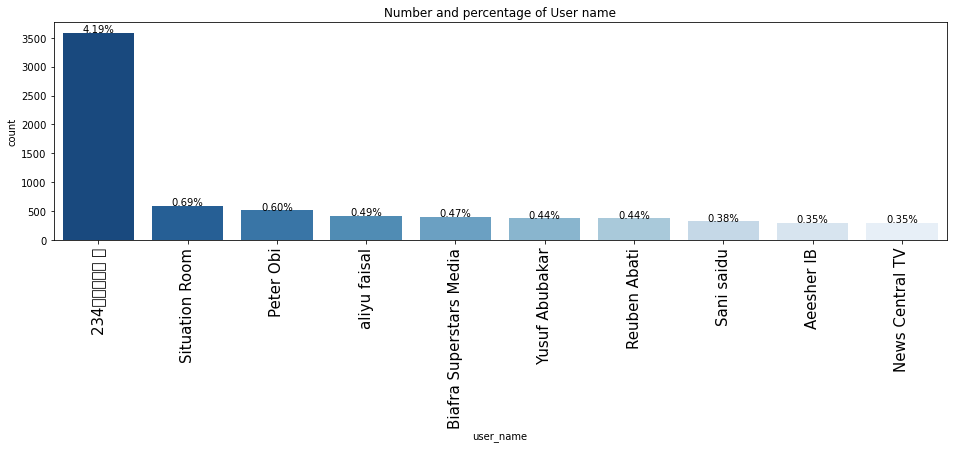

In [14]:
plot_count("user_name", "User name", tweets_df,4)

The top 10 most popular user names are shown above, with '234' having the most username who tweeted the most and there are little significant difference in other user name.there are only minor differences in the frequency of appearance of the other user names in the top 10 list. This suggests that the distribution of user names is relatively even, with no other user name being significantly more popular than the others in the top 10 list.

### User description (top 10)

User description, top 10, by prevalence.

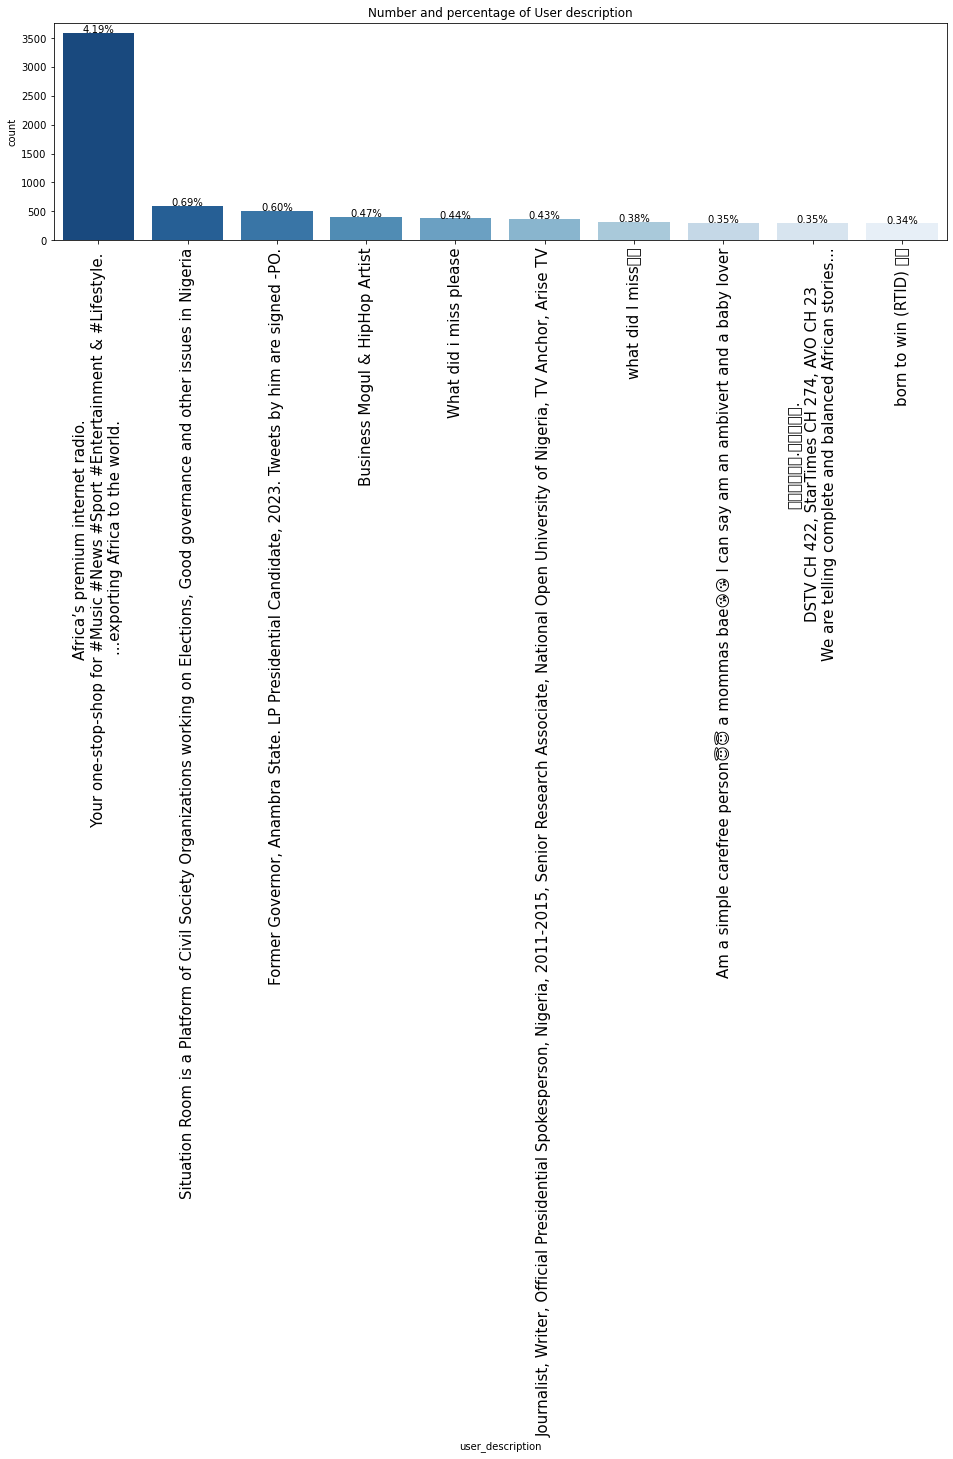

In [15]:
plot_count("user_description", "User description", tweets_df,4)

The above shows the top 10 most popular user description  with 'African premiun internet radio'(with 4.25%) and 'Situation room'(with 0.78%) having the highest user descrioption who tweeted the most and there are little significant difference in other user's.there are no major signficant differences in the frequency of appearance of the other user names in the last two of the top 10 list.

### Tweet source (top 10)

showing the top 10 tweet source, by prevalence.

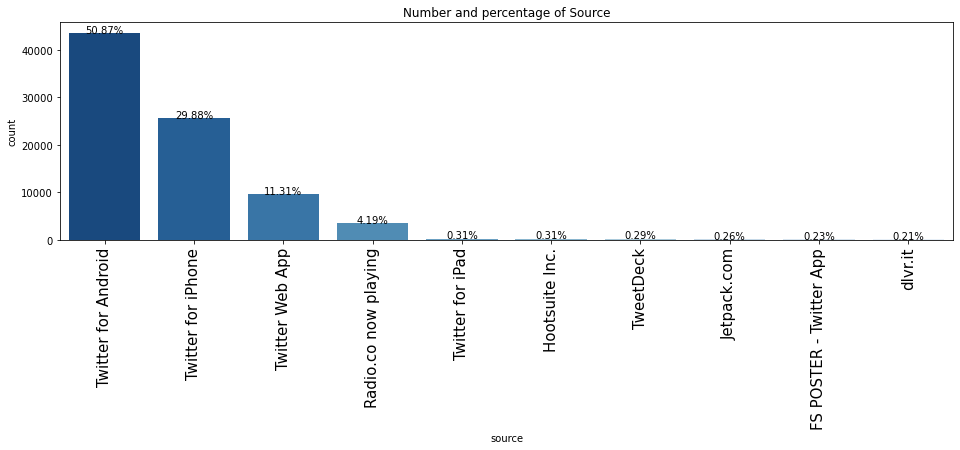

In [16]:
plot_count("source", "Source", tweets_df,4)

According to the above visual, 'Twitter for Android' is the most popular tweet source, accounting for 50.99% of the tweets from the top users. 'Twitter for iPhone' is the second most popular tweet source, accounting for 29.78% of the tweets, while 'Twitter Web App' is the third most popular tweet source, accounting for 11.38% of the tweets.there are only minor differences in the frequency of appearance of the other tweet source in the top 10 list. this information gives an insight into the different tweet sources used by a group of Twitter users who tweeted the most, with 'Twitter for Android' being the most frequently used among them.

### User location (Top 10)

showing the top 10 user location, by prevalence.

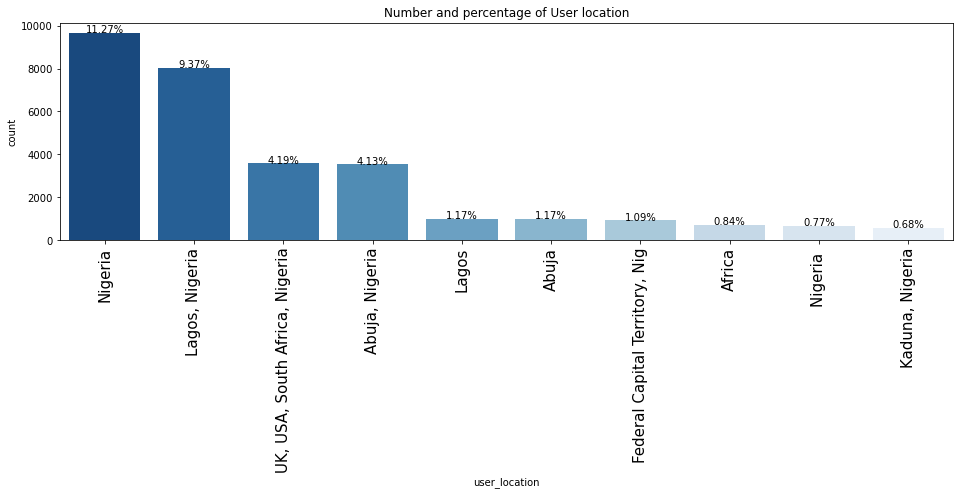

In [17]:
plot_count("user_location", "User location", tweets_df,4)

We observe that the same location appears written in different ways. For example Lagos (capital city of Nigeria) appears written as `Lagos, Nigeria` as well as simply `Lagos`. Also there are generic names, like `UK, USA, Africa, Nigeria` or `Africa` or even funny or irelevant names like `Next Door`. It also shows that Nigeria has the higest loaction of users who tweeted the most accounting for 11.27% and this provides insights into the demographics of the Twitter users in the dataset. It suggests that Nigeria is a prominent location among these users, and this could be due to a variety of factors, such as a high level of political engagement or due to present election in Nigeria.

### Hashtags (Top 10)

showing the top 10 hashtags, by prevalence.

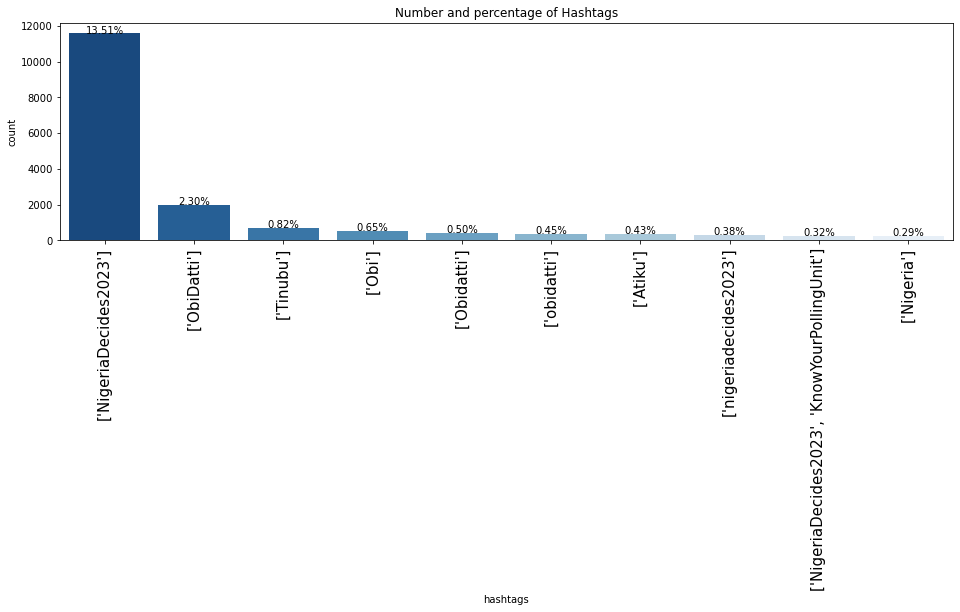

In [18]:
plot_count("hashtags", "Hashtags", tweets_df,4)

The above shows that among the top 10 hashtags used "NigeriaDecide2023' has the highest most used hashtags accounting for 13.43% compare with other hashtags. This information gives insights into the interests and topics that are most relevant or important to the Twitter users in the dataset. The fact that 'NigeriaDecide2023' is the most commonly used hashtag indicates that discussions related to Nigeria's upcoming elections in 2023 are prominent among these Twitter users.

Furthermore, the high percentage of usage for this hashtag suggests that it is a significant and widely discussed topic among these Twitter users. This could indicate a high level of political engagement among the users or a strong interest in the political future of Nigeria.

Overall, this information provides valuable insights into the topics and issues that are most important to a group of Twitter users, as well as their level of engagement and interest in these topics.

In [19]:
#displaying a function to quickly generate a visual representation of the 
#most frequent words in a piece of text column used in the dataset. 
#and to identify important themes or topics within the data.


stopwords = set(STOPWORDS)

def show_wordcloud(data, mask=None, title=""):
    text = " ".join(t for t in data.dropna())
    stopwords = set(STOPWORDS)
    stopwords.update(["t", "co", "https", "amp", "U", "Comment", "text", "attr", "object"])
    wordcloud = WordCloud(stopwords=stopwords, scale=4, max_font_size=50, max_words=500,mask=mask, background_color="white").generate(text)
    fig = plt.figure(1, figsize=(16,16))
    plt.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()    
    
    

### Text wordclouds

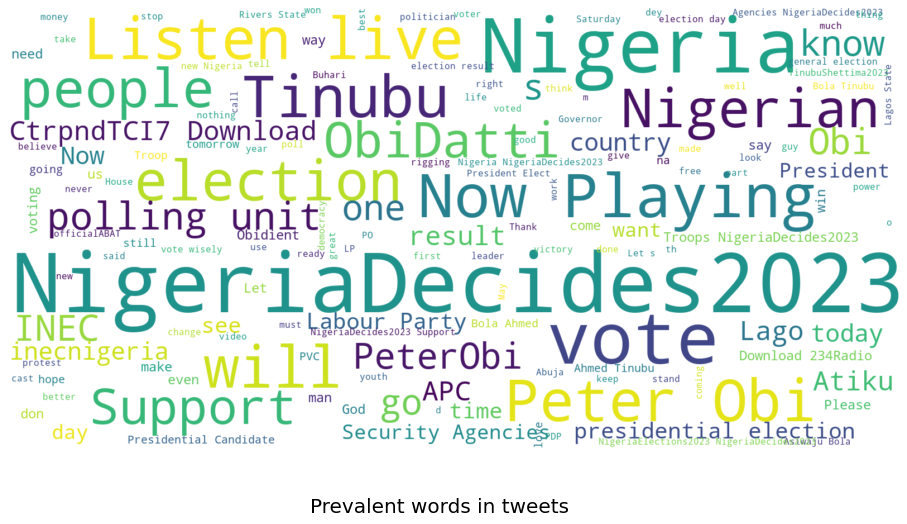

In [20]:
show_wordcloud(tweets_df['text'], title = 'Prevalent words in tweets')

the above shows the variou theme used during the Nigeria election

### User Locations, as wordcloud

Let's look again to locations, now using the wordcloud.

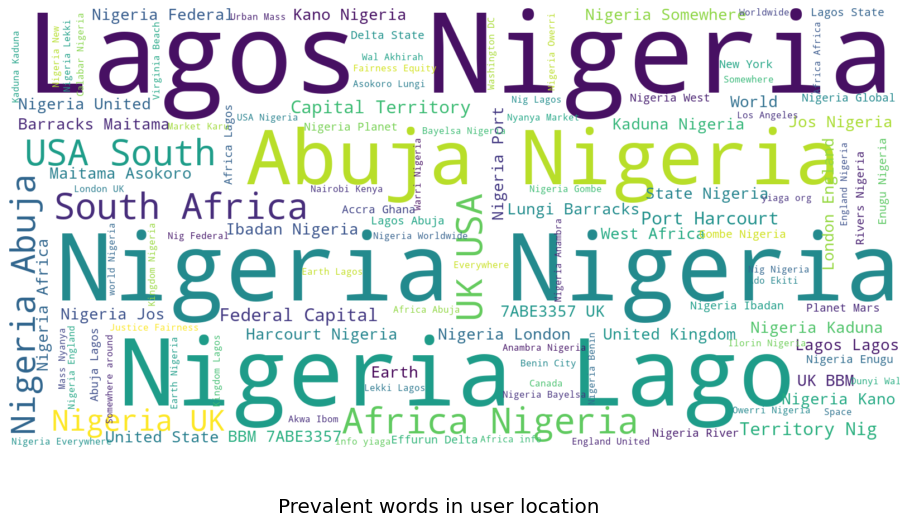

In [21]:
show_wordcloud(tweets_df['user_location'], title = 'Prevalent words in user location')

The above shows the various locations of user's and the most prominent being used 

### User description as wordclouds

Let's look again to user description, now using the wordcloud.

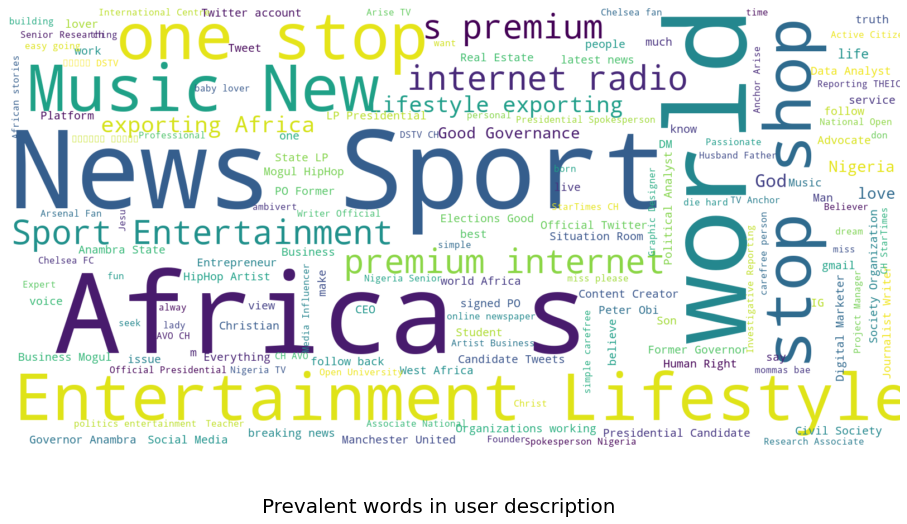

In [22]:
show_wordcloud(tweets_df['user_description'], title = 'Prevalent words in user description')

### Hashtags as wordclouds

Let's look again to Hashtags, now using the wordcloud.

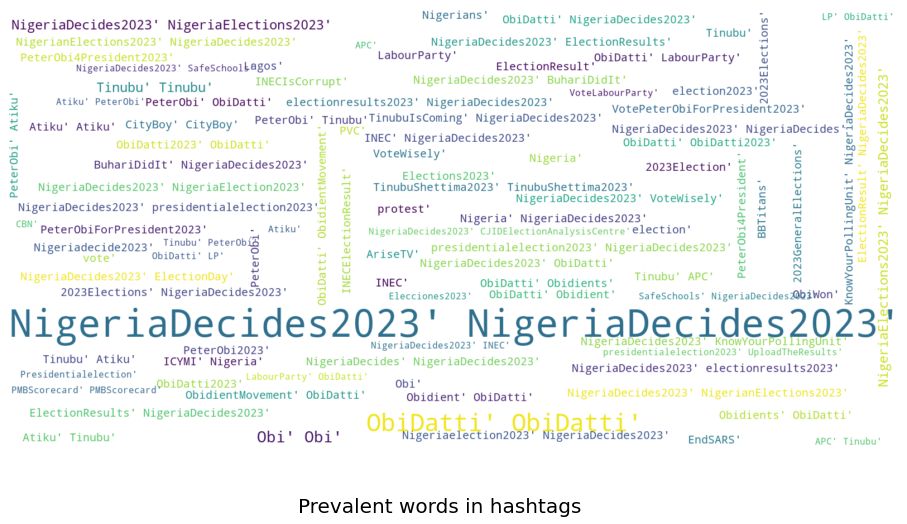

In [23]:
show_wordcloud(tweets_df['hashtags'], title = 'Prevalent words in hashtags')

### Extract date and time features

In [24]:
#converting the date column to the appriopriate datatype
tweets_df['datedt'] = pd.to_datetime(tweets_df['date'], errors="coerce")

In [25]:
#creating a new column from the date column
tweets_df['year'] = tweets_df['datedt'].dt.year
tweets_df['month'] = tweets_df['datedt'].dt.month
tweets_df['day'] = tweets_df['datedt'].dt.day
tweets_df['dayofweek'] = tweets_df['datedt'].dt.dayofweek
tweets_df['dayofweek_name'] = tweets_df['datedt'].dt.day_name()
tweets_df['hour'] = tweets_df['datedt'].dt.hour
tweets_df['minute'] = tweets_df['datedt'].dt.minute
tweets_df['dayofyear'] = tweets_df['datedt'].dt.dayofyear
tweets_df['date_only'] = tweets_df['datedt'].dt.date

### Time variation

In [26]:
#aggregating data by "date_only" column and 
#performing some operation on the data within each group by counting the number of rows
tweets_agg_df = tweets_df.groupby(["date_only"])["text"].count().reset_index()
tweets_agg_df.columns = ["date_only", "count"]

In [27]:
#creating a line plot to visualize how a particular variable changes over time or across categories.
def plot_time_variation(df, x='date_only', y='count', hue=None, size=1, title="", is_log=False):
    f, ax = plt.subplots(1,1, figsize=(4*size,3*size))
    g = sns.lineplot(x=x, y=y, hue=hue, data=df)
    plt.xticks(rotation=90)
    if hue:
        plt.title(f'{y} grouped by {hue} | {title}')
    else:
        plt.title(f'{y} | {title}')
    if(is_log):
        ax.set(yscale="log")
    ax.grid(color='black', linestyle='dotted', linewidth=0.75)
    plt.show() 

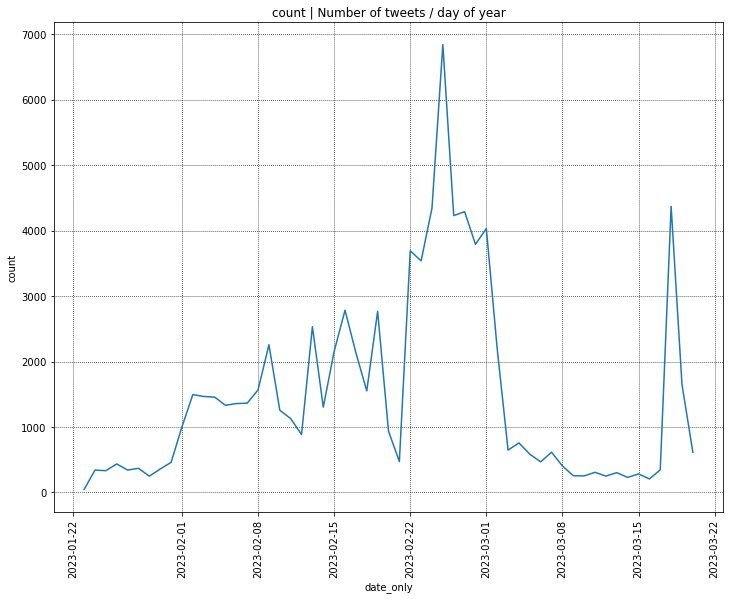

In [28]:
plot_time_variation(tweets_agg_df, title="Number of tweets / day of year",size=3)


We can observe from the above visuals that there was a gradual increase in the number of tweets posted by users from January 22, 2023, which reached its peak on February 25. It is likely that this increase was due to the election day. Subsequently, there was a significant drop in the number of tweets between March 1 and March 15. However, on March 18, there was another sudden rise in the number of tweets. This suggests that users were particularly active on election day, resulting in a surge of tweets, and the subsequent fluctuations in tweet volume may reflect varying levels of engagement with the election-related discussions on Twitter.

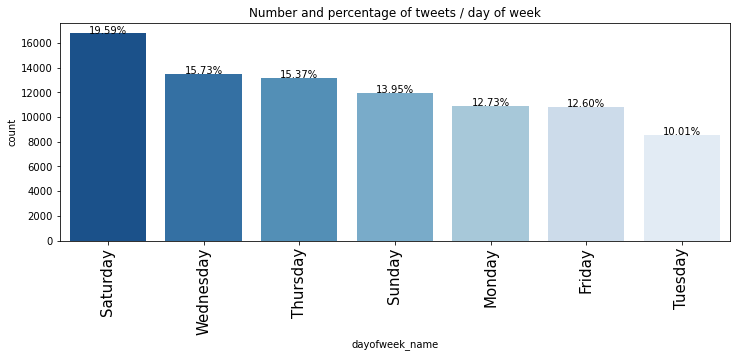

In [29]:


plot_count("dayofweek_name", "tweets / day of week", tweets_df, size=3, ordered=True)

The above shows that the distribution of tweets per day of the week indicates that Twitter users tend to tweet the most on Saturdays, Wednesdays, Thursdays, and Sundays, with the highest level of activity on Saturdays. However, the number of tweets gradually declines until it reaches its lowest levels on Mondays and Tuesdays. 
This can be due to the fact that Saturdays and Sundays are part of the weekend, while Thursdays and Wednesdays fall in the middle of the week. 

One possible explanation for the distribution of tweet activity by day of the week is that Twitter users tend to be more active on weekends and weekdays that fall in the middle of the week, such as Saturday and sunday & Wednesday and Thursday respectively. This pattern may be due to the fact that weekends offer more leisure time for people to engage in social media activities where people are more likely to be home or relaxed, while Wednesdays and Thursdays may be seen as a "hump day" where people are looking for a break from work or school. while activity levels tend to decline gradually over the weekend and reach their lowest levels on Mondays and Tuesdays, which are typically considered the start of the workweek. This pattern suggests that Twitter users may be more likely to engage with content that is posted during peak periods of activity, such as on weekends and Thursdays.

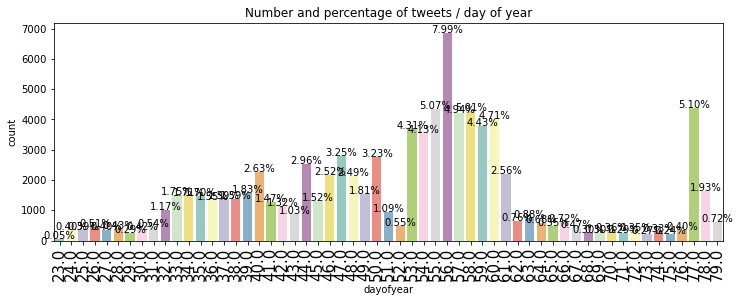

In [30]:
plot_count("dayofyear", "tweets / day of year", tweets_df, size=3, ordered=False)

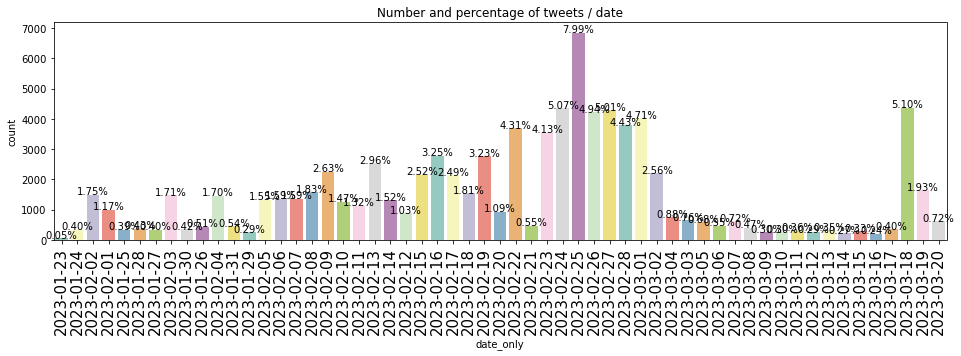

In [31]:
plot_count("date_only", "tweets / date", tweets_df,size=4, ordered=False)

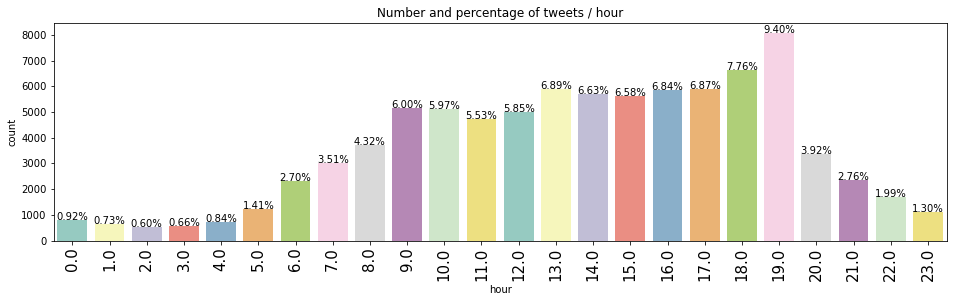

In [32]:
plot_count("hour", "tweets / hour", tweets_df,size=4, ordered=False)


The graph above shows that there are almost an equal number of tweets during the early hours of the day. However, there is a gradual increase from 7 to 10 AM, indicating that more people tend to tweet during that time frame.

There is also no increase in the number of users who tweeted from 9 to 12 PM.It is possible that users are at work during this time frame, but there could be other factors that contribute to the lack of increase in tweets. However, there is a gradual increase from 4 PM to 7 PM, and 7 PM has the peak hour of users who tweeted the most. This could be attributed to the time when users leave work and school. This indicates that more people tend to tweet during this time frame, possibly due to having more free time available after work/school hours.

The graph also shows that there is a sudden drop in the number of tweets from 8 to 11 PM, indicating that fewer people tend to tweet during this time frame. This could be due to various reasons, such as people engaging in other activities or simply going to bed.

## Sentiment analyis

We use `SentimentIntensityAnalyzer` from `nltk.sentiment` to evaluate the sentiment of the tweets text.

In [33]:
# borrowed from https://www.kaggle.com/pashupatigupta/sentiments-transformer-vader-embedding-bert
sia = SentimentIntensityAnalyzer()
def find_sentiment(post):
    try:
        if sia.polarity_scores(post)["compound"] > 0:
            return "Positive"
        elif sia.polarity_scores(post)["compound"] < 0:
            return "Negative"
        else:
            return "Neutral"  
    except:
        return "Neutral"

In [34]:
def plot_sentiment(df, feature, title):
    counts = df[feature].value_counts()
    percent = counts/sum(counts)

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
    c = ['green', 'orange', 'red']
    counts.plot(kind='bar', ax=ax1, color=c)
    percent.plot(kind='bar', ax=ax2, color=c)
    ax1.set_ylabel(f'Counts : {title} sentiments', size=12)
    ax2.set_ylabel(f'Percentage : {title} sentiments', size=12)
    plt.suptitle(f"Sentiment analysis: {title}")
    plt.tight_layout()
    plt.show()

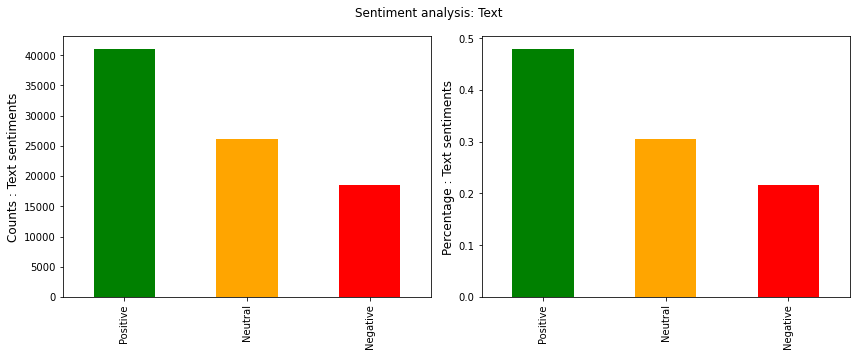

In [35]:
tweets_df['text_sentiment'] = tweets_df['text'].apply(lambda x: find_sentiment(x))
plot_sentiment(tweets_df, 'text_sentiment', 'Text')

Most of the tweets are evaluated as positive (>40%), next are neutral (<30%) and the rest (<25%) are negative. This shows that the majority of the tweets had a positive or neutral sentiment, while a smaller proportion expressed a negative sentiment.

### Wordclouds with positive, neutral and negative tweets

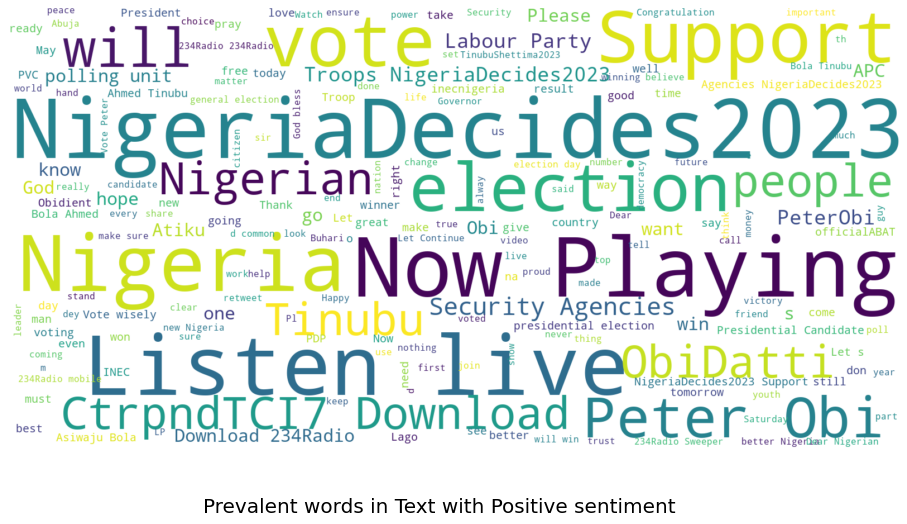

In [36]:
show_wordcloud(tweets_df.loc[tweets_df['text_sentiment']=="Positive", 'text'], title = 'Prevalent words in Text with Positive sentiment', mask=None)

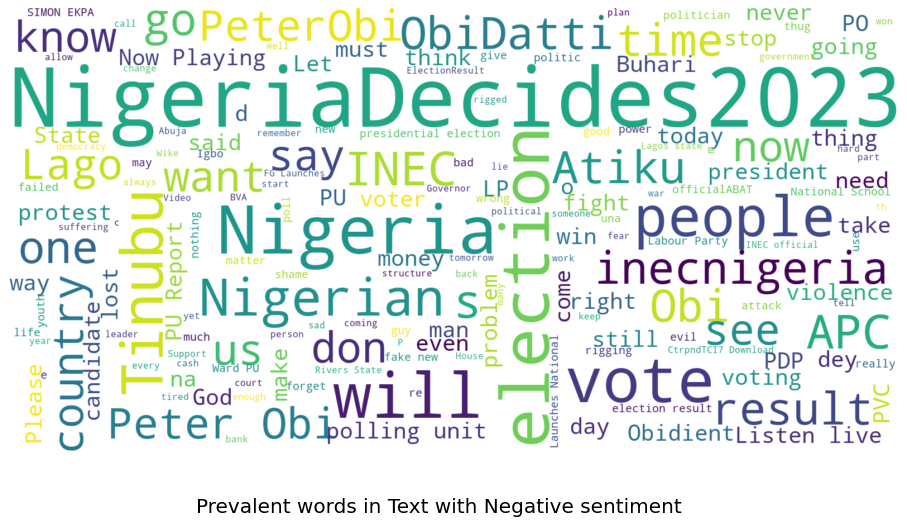

In [37]:
show_wordcloud(tweets_df.loc[tweets_df['text_sentiment']=="Negative", 'text'], title = 'Prevalent words in Text with Negative sentiment', mask=None)

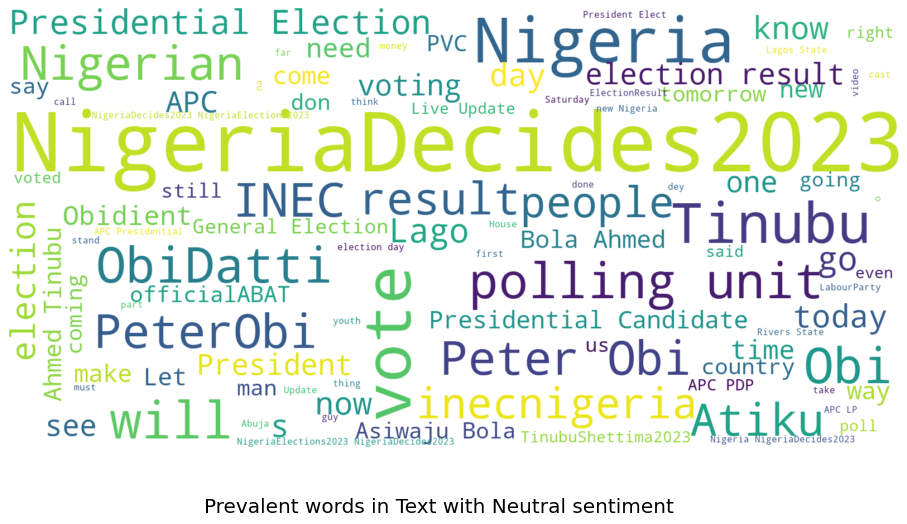

In [38]:
show_wordcloud(tweets_df.loc[tweets_df['text_sentiment']=="Neutral", 'text'], title = 'Prevalent words in Text with Neutral sentiment', mask=None)

### Is there a mostly positive or mostly negative contributor?


Let's group tweets by contributor and sentiment.

In [39]:
agg_tweets_df = tweets_df.groupby(["user_name", "user_description", "user_location", "text_sentiment"])['text'].count().reset_index()

In [40]:
agg_tweets_df.columns = ["user_name", "user_description", "user_location", "text_sentiment", "count"]
agg_tweets_df.sort_values(by=["count"], ascending=False, inplace=True)

#### Top 15 positive tweets (who is tweeting most of positive tweets?)

In [41]:
agg_tweets_df.loc[agg_tweets_df.text_sentiment=="Positive"].head(15)

,user_name,user_description,user_location,text_sentiment,count
496,234𝐑𝐚𝐝𝐢𝐨 🌍,Africa’s premium internet radio. \nYour one-st...,"UK, USA, South Africa, Nigeria",Positive,3319
19950,Peter Obi,"Former Governor, Anambra State. LP Presidentia...",Nigeria,Positive,297
26262,Yusuf Abubakar,What did i miss please,Lungi Barracks Maitama Asokoro,Positive,245
28526,ummee220,Proudly Muslimah🥰Introvert😍A lady with class💕M...,"Kaduna, Nigeria",Positive,200
22881,Stephen Peter,Am cool calm and love people,Abuja,Positive,184
2328,Aisha Ahmed,Islam,"Kano, Nigeria",Positive,172
20690,Queen of the South,Follow I follow back\nlover 💙\nCounselor,"Federal Capital Territory, Nig",Positive,166
2083,Aeesher IB,Am a simple carefree person😇😇 a mommas bae😘😘 I...,Kaduna,Positive,160
29023,‎فيصل,"(F❤️Z and J) If you hear of my death, please p...",Dunyi Wal Akhirah,Positive,142
4339,Biafra Superstars Media,Business Mogul & HipHop Artist,"UK, BBM: 7ABE3357",Positive,138


#### Top 15 negative tweets (who is tweeting most of the negative tweets?)

In [42]:
agg_tweets_df.loc[agg_tweets_df.text_sentiment=="Negative"].head(15)

,user_name,user_description,user_location,text_sentiment,count
22450,Situation Room,Situation Room is a Platform of Civil Society ...,Nigeria,Negative,404
494,234𝐑𝐚𝐝𝐢𝐨 🌍,Africa’s premium internet radio. \nYour one-st...,"UK, USA, South Africa, Nigeria",Negative,264
4337,Biafra Superstars Media,Business Mogul & HipHop Artist,"UK, BBM: 7ABE3357",Negative,179
21046,Reuben Abati,"Journalist, Writer, Official Presidential Spok...",Nigeria,Negative,138
19948,Peter Obi,"Former Governor, Anambra State. LP Presidentia...",Nigeria,Negative,122
23794,The ICIR,The International Centre for Investigative Rep...,"Abuja, Nigeria",Negative,108
16402,Mujaheed ❈,Deen || Muslim.|| Josite || ABUSITE || Builder...,"Jos, Nigeria",Negative,99
2081,Aeesher IB,Am a simple carefree person😇😇 a mommas bae😘😘 I...,Kaduna,Negative,87
24057,TheCable,Nigeria's independent online newspaper,Nigeria,Negative,75
8413,Ejes Gist News,"Read top Nigerian news in politics, entertainm...","Effurun, Delta State.",Negative,68


#### Top 15 negative tweets (who is tweeting most of the neutral tweets?)

In [43]:
agg_tweets_df.loc[agg_tweets_df.text_sentiment=="Neutral"].head(15)

,user_name,user_description,user_location,text_sentiment,count
16992,News Central TV,"𝐀𝐟𝐫𝐢𝐜𝐚.𝐅𝐢𝐫𝐬𝐭.\nDSTV CH 422, StarTimes CH 274, ...",Africa,Neutral,166
5363,Centre for Journalism Innovation and Development,We work to strengthen West Africa’s journalism...,West Africa,Neutral,144
22451,Situation Room,Situation Room is a Platform of Civil Society ...,Nigeria,Neutral,130
21047,Reuben Abati,"Journalist, Writer, Official Presidential Spok...",Nigeria,Neutral,109
23795,The ICIR,The International Centre for Investigative Rep...,"Abuja, Nigeria",Neutral,96
26134,Yiaga Africa,The official twitter account of Yiaga Africa. ...,Africa - info@yiaga.org,Neutral,95
17130,NigerianEye.com,Unbiased news/information in and around Nigeri...,Lagos Nigeria,Neutral,93
19949,Peter Obi,"Former Governor, Anambra State. LP Presidentia...",Nigeria,Neutral,93
24058,TheCable,Nigeria's independent online newspaper,Nigeria,Neutral,90
4338,Biafra Superstars Media,Business Mogul & HipHop Artist,"UK, BBM: 7ABE3357",Neutral,88


It is interesting to see that `Peter Obi`, one of the presidential candidates, is in top 2 for positive tweets (with 147) but also in top 5 with negative tweets (with 61).  
234𝐑𝐚𝐝𝐢𝐨 🌍 appears as 1st contributor with positive news and also first contributor with negative tweets. His Positive / Negative ratio is more than 10/1.
It is also suprising to see Reuben Abatti who in bottom 3 with positive tweets(with 122) appears as 3rd and 2nd contributor with negative and neutral news respectively

Let's see a selection of negative and positive tweets by `Peter Obi` and of Reuben Abatti


#### Selection of positive tweets by Peter Obi

Let's select the most liked positive tweets by Peter Obi

In [44]:
tweets_df.loc[(tweets_df.text_sentiment=="Positive") & (tweets_df.user_name=="Peter Obi")]["text"].values[0:10]


array(['Thank you Katsina for the warm reception.-PO',
       'My Campaign train landed in Katsina today for more fruitful political engagements with the people. Again, just like… https://t.co/0QPqoQXvb9',
       'I urge you all to go and collect your PVC and vote in this critical election. I am the Labour Party candidate, and… https://t.co/uISVDhKlmd',
       'Again, the massive support we received at Gombe and Borno States today reassured me of the very victory we as Niger… https://t.co/oCpOcGBXvt',
       'May God Almighty continue to protect and bless the good people of Abia State, and our nation Nigeria. -PO',
       'May God Almighty, who called him home grant him eternal rest in His Kingdom, and grant his immediate family, and th… https://t.co/Xm8UhtUel7',
       'I sincerely commiserate with the Abia State Governor, H.E. Okezie Ikpeazu; the PDP Family and the entire people of… https://t.co/70pA8rPOiK',
       "Good morning to the good people of Gombe. I'm looking forward to our

##### Negative tweets by `Peter Obi`

Let's select the most liked negative tweets by `Peter Obi`

In [45]:
tweets_df.loc[(tweets_df.text_sentiment=="Negative") & (tweets_df.user_name=="Peter Obi"), "text"].values[0:10]

array(['I condemn the gruesome killing of Christopher Ohizu, the Ideato North LGA chairman. Things like these ought not to… https://t.co/8dtEuSL0uD',
       "In deference, we have postponed our Labour Party's Presidential Rally in Abia state, earlier scheduled for 31st Jan… https://t.co/l9sUAU8c0e",
       "I was shocked to read the sad news of the death of Prof. Uche Ikonne, the Peoples Democratic Party's Governorship Candidate in Abia State.",
       'We must tackle food insecurity and weak currency to turn the country around; we must cut cost of governance and fig… https://t.co/zvmrtX8aF1',
       'The bulk of SMEs will be driven by youths as a means of tackling youth unemployment.  Our 4th industrial revolution… https://t.co/vh885aIBwm',
       'We will build a society that is premised on the rule of law as we strive to secure and unite Nigeria. Insecurity is… https://t.co/wXKrCmYw6s',
       'This morning, I had a media chat with representatives of CNN, Al Jazeera and Economist ne

##### Selection of positive tweets by `Reuben Abati`

Let's select the most liked positive tweets by `Reuben Abati`

In [46]:
tweets_df.loc[(tweets_df.text_sentiment=="Positive") & (tweets_df.user_name=="Reuben Abati")]["text"].values[0:10]


array(['Atiku Spurns G-5 Govs Because Of Aso Rock Cabal’s Support – Wike \n\n#Nigeria #Iworoad #Greenwood #CommanderinChief… https://t.co/pnYIF6aG6N',
       'Fuel Scarcity: Federal Govt Moves To Restore Normalcy\n\n#Nigeria #Iworoad #Greenwood #CommanderinChief #Tinubu #ASUU… https://t.co/ygnbYG1Z05',
       'Cash Swap: FG, CBN Haven’t Disobeyed Supreme Court Order – Presidency\n\n#Nigeria #CBNAct #SupremeCourt #ManUnited… https://t.co/wvR5PnqNI8',
       '[STATE HOUSE PRESS RELEASE] President Buhari Congratulates Dr Pate on Gavi’s Appointment, Says Nigeria Is Proud Of… https://t.co/EDRqySisJi',
       'Anxiety As Supreme Court Hears Suit On Naira Swap Policy Today\n\n#Nigeria #CBNAct #SupremeCourt #ManUnited #ASUU… https://t.co/xY4KB7hrLm',
       '[OPINION] Elements of Good Governance - Femi Falana\n\n#Nigeria #CBNAct #SupremeCourt #ManUnited #ASUU #NURTW… https://t.co/TdPHx4oGWs',
       'Court Disbands Ebubeagu Security Outfit In Southeast Nigeria\n\n#Nigeria #CBNAct #SupremeCourt

##### Selection of negative tweets by `Reuben Abati`

Let's select the most liked negative tweets by `Reuben Abati`

In [47]:
tweets_df.loc[(tweets_df.text_sentiment=="Negative") & (tweets_df.user_name=="Reuben Abati"), "text"].values[0:10]

array(['CITY TALKS WITH REUBEN ABATI: New Naira Note scarcity and the lingering fuel crisis - Abiodun Adeniyi \n\n#Nigeria… https://t.co/3X8jkQMQW8',
       'Makinde deploys free buses in Oyo over naira notes, fuel crisis \n\n#Nigeria #Iworoad #Greenwood #CommanderinChief… https://t.co/Q1FraR7OkA',
       'PHOTOS: Angry SS3 Students Set School Ablaze After Principal Failed To Register Them For WAEC \n\n#Nigeria #Iworoad… https://t.co/N3wXV2wVMv',
       '‘People Need Cash Daily’ – Osinbajo Disturbed Over New Naira Notes Scarcity \n\n#Nigeria #Iworoad #Greenwood… https://t.co/eQTXPUSpD6',
       'Foreign Flights: Passengers Dump Nigeria Airports For Cotonou, Ghana Over High Ticket Fare \n\n#Nigeria #Iworoad… https://t.co/wge5HKfxOU',
       '[INTERVIEW] Atiku became next option after Osinbajo lost ticket – Ex-APC Chieftain \n\n#Nigeria #Iworoad #Greenwood… https://t.co/rQe0a6t5TY',
       '[INTERVIEW] Terrorists displaying new naira proves CBN policy futile – Sheikh Gumi \n\n#Nigeria #I

##### Selection of neutral tweets by `Reuben Abati`

Let's select the most liked neutral tweets by `Reuben Abati`

In [48]:
tweets_df.loc[(tweets_df.text_sentiment=="Neutral") & (tweets_df.user_name=="Reuben Abati"), "text"].values[0:10]

array(['POS operators buy Naira notes from petrol stations \n\n#Nigeria #Iworoad #Greenwood #CommanderinChief #Tinubu #ASUU… https://t.co/wec6XpIyob',
       'Babachir Lawal: Buhari Not In Charge Of His Govt – Says Peter Obi Is The Light \n\n#Nigeria #Iworoad #Greenwood… https://t.co/GkbevRUVux',
       'New Naira Policy: ‘Our Business Is Not To Make The People Suffer’ – Wike Tells Buhari \n\n#Nigeria #Iworoad… https://t.co/iNxXmmeYXk',
       'EFCC Parades Actress For Spraying, Stepping On New Naira Notes \n\n#Nigeria #Iworoad #Greenwood #CommanderinChief… https://t.co/dH1NJclnaN',
       'Election: Nigeria Cleric Discloses What Would Happen If Atiku Or Tinubu Becomes President \n\n#Nigeria #Iworoad… https://t.co/NFiCnlYdjJ',
       '[OPINION] Ten points from ten months: Reflections from NIPSS - Bell Ihua \n\n#Nigeria #Iworoad #Greenwood… https://t.co/O2uUd1wEyV',
       'How to report PoS operators charging above N200 for N10k – CBN\n\n#Nigeria #CBNAct #SupremeCourt #ManUnited #ASUU…

## Topic Modeling

For topic modeling we are using first Latent Semantic Analysis.  
For this, we will need to start with preprocessing the tweets.   



In [49]:
count_vectorizer = CountVectorizer(stop_words='english', max_features=40000)
tweets_df["clean_text"] = tweets_df["text"].dropna().apply(lambda x: x.replace('https', ''))
tweets_df["clean_text"] = tweets_df["clean_text"].dropna().apply(lambda x: x.replace('http', ''))
tweets_df["clean_text"] = tweets_df["clean_text"].dropna().apply(lambda x: x.replace('amp', ''))
text_sample = tweets_df["clean_text"].dropna().values


print('Headline before vectorization: {}'.format(text_sample[10]))

document_term_matrix = count_vectorizer.fit_transform(text_sample)

print('Headline after vectorization: \n{}'.format(document_term_matrix[10]))

Headline before vectorization: Do make your vote 🗳 count!
#AtikuOkowa2023  #AtikuInBayelsa #atiku #bola2023 
@atiku @atiku_amc @PeterObi… ://t.co/AaR8cPnadS
Headline after vectorization: 
  (0, 23605)	1
  (0, 3315)	2
  (0, 3326)	1
  (0, 14948)	1
  (0, 32915)	1
  (0, 6440)	1
  (0, 3346)	1
  (0, 4443)	1


Let's set the number of topics.

In [50]:
number_topics = 10

We are using truncated singular value decomposition for implementing LSA.

In [51]:
lsa_model = TruncatedSVD(n_components=number_topics)
lsa_topic_matrix = lsa_model.fit_transform(document_term_matrix)

In [52]:
# Define helper functions
def get_keys(topic_matrix):
    '''
    returns an integer list of predicted topic 
    categories for a given topic matrix
    '''
    keys = topic_matrix.argmax(axis=1).tolist()
    return keys

def keys_to_counts(keys):
    '''
    returns a tuple of topic categories and their 
    accompanying magnitudes for a given list of keys
    '''
    count_pairs = Counter(keys).items()
    categories = [pair[0] for pair in count_pairs]
    counts = [pair[1] for pair in count_pairs]
    return (categories, counts)

In [53]:
lsa_keys = get_keys(lsa_topic_matrix)
lsa_categories, lsa_counts = keys_to_counts(lsa_keys)

In [54]:
# Define helper functions
def get_top_n_words(n, keys, document_term_matrix, count_vectorizer):
    '''
    returns a list of n_topic strings, where each string contains the n most common 
    words in a predicted category, in order
    '''
    top_word_indices = []
    for topic in range(number_topics):
        temp_vector_sum = 0
        for i in range(len(keys)):
            if keys[i] == topic:
                temp_vector_sum += document_term_matrix[i]
        temp_vector_sum = temp_vector_sum.toarray()
        top_n_word_indices = np.flip(np.argsort(temp_vector_sum)[0][-n:],0)
        top_word_indices.append(top_n_word_indices)   
    top_words = []
    for topic in top_word_indices:
        topic_words = []
        for index in topic:
            temp_word_vector = np.zeros((1,document_term_matrix.shape[1]))
            temp_word_vector[:,index] = 1
            the_word = count_vectorizer.inverse_transform(temp_word_vector)[0][0]
            topic_words.append(the_word.encode('ascii').decode('utf-8'))
        top_words.append(" ".join(topic_words))         
    return top_words

In [55]:
top_n_words_lsa = get_top_n_words(10, lsa_keys, document_term_matrix, count_vectorizer)

for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i+1), top_n_words_lsa[i])

Topic 1:  nigeriadecides2023 election support inec nigeria 2023 troops results elections inecnigeria
Topic 2:  234radio live listen playing ctrpndtci7 download ft mobile app sweeper
Topic 3:  vote obi atiku election nigeria tinubu peter presidential don party
Topic 4:  vote obidatti don wisely let lp obi nigerians party peterobi
Topic 5:  nigeria new election elections obidatti president 2023 people god let
Topic 6:  obi peter man president peterobi common obidatti nigeria nigeriadecides2023 people
Topic 7:  tinubu president bola asiwaju apc ahmed atiku presidential officialabat candidate
Topic 8:  state apc lagos pdp time unit lp polling ward lga
Topic 9:  obidatti people peterobi let god just obidients dey don like
Topic 10:  support security agencies troops centre nigeriadecides2023 national schools emergency election


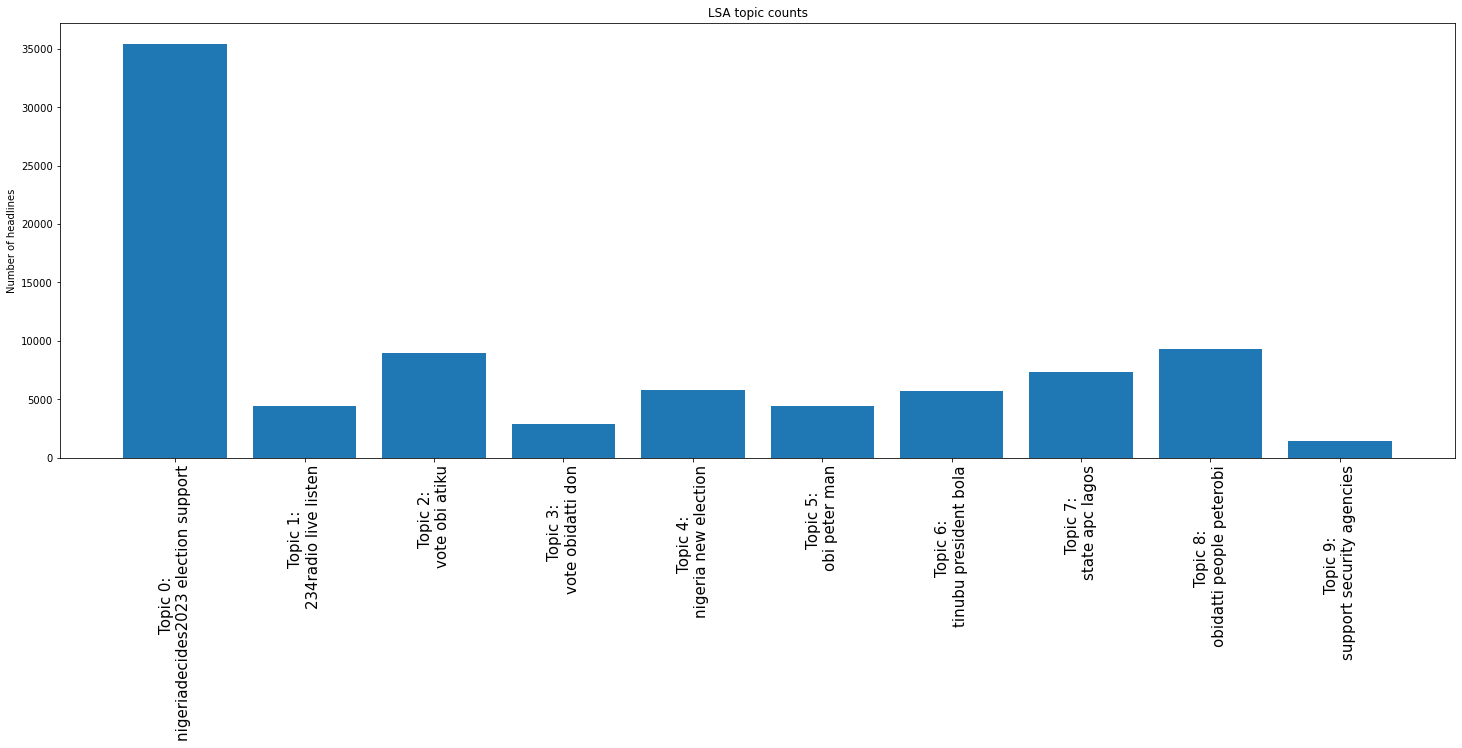

In [56]:
top_3_words = get_top_n_words(3, lsa_keys, document_term_matrix, count_vectorizer)
labels = ['Topic {}: \n'.format(i) + top_3_words[i] for i in lsa_categories]

fig, ax = plt.subplots(figsize=(25,8))
ax.bar(lsa_categories, lsa_counts);
ax.set_xticks(lsa_categories);
ax.set_xticklabels(labels);
ax.set_ylabel('Number of headlines');
ax.set_title('LSA topic counts');
plt.xticks(rotation=90, size=15);
plt.show()


the graph shows that "Nigeriadecide2023, electionsupport has the highest 